<a href="https://colab.research.google.com/github/aranyamisra/college-coursework/blob/main/stroke-prediction-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stroke Prediction

## Objective

To perform an exploratory data analysis (EDA) on the Stroke Prediction Dataset to identify key health and lifestyle factors associated with stroke occurrence. The aim is to uncover patterns, trends, and correlations that can support healthcare professionals in understanding stroke risks and targeting preventive measures effectively.

## Dataset Used

**Stroke Prediction Dataset:**

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**Total entries:** 5,110

**Features:** 12

gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke (target)



## Audience

**Primary Audience:** Healthcare professionals and public health researchers

**Reason:** The case study is designed to help healthcare professionals, policy makers, and health analysts understand the demographic and medical factors linked to stroke occurrences. It aims to offer actionable insights from the dataset that could assist in stroke prevention, patient risk stratification, and awareness campaigns — without delving into technical modeling.

## Reading the dataset

In [ ]:
import pandas as pd

data = pd.read_csv('stroke-dataset.csv')
print("Dataset Preview:")
print(data.head())

Dataset Preview:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## Clean and Preprocess the Data

In [ ]:
print("Initial Data Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

# Handles missing values in 'bmi', and fill with mean value
data['bmi'].fillna(data['bmi'].mean(), inplace=True)

print("\nCleaned Data Info:")
print(data.info())
print("\nAny Nulls Left?:")
print(data.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Missing Values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease  

<ipython-input-2-c5542fb45c12>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(), inplace=True)


## Data Summary

In [ ]:
print("Data Summary:")
print(data.describe())

Data Summary:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.698018     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.400000     0.000000  
75%           114.090000    3

## Exploratory Data Analysis (EDA)

### Visualise Data Distributions

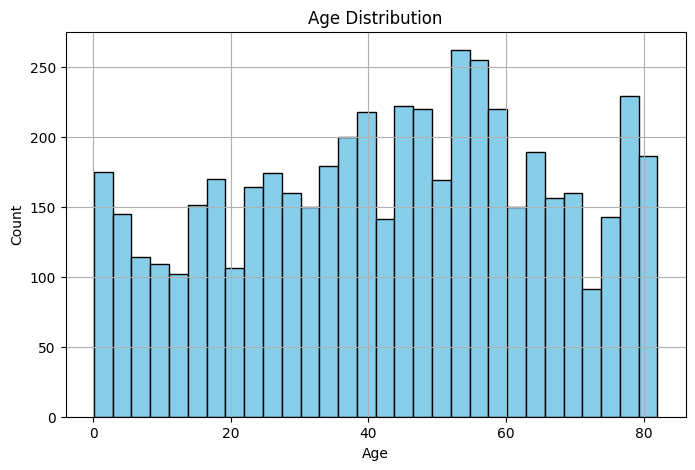

In [ ]:
import matplotlib.pyplot as plt

# Age Distribution
plt.figure(figsize=(8, 5))
plt.hist(data['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

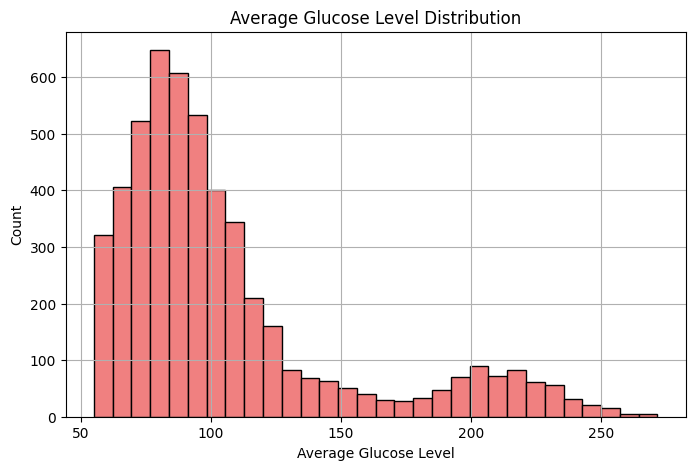

In [ ]:
# Average Glucose Level
plt.figure(figsize=(8, 5))
plt.hist(data['avg_glucose_level'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.grid(True)
plt.show()

### Scatter Plot

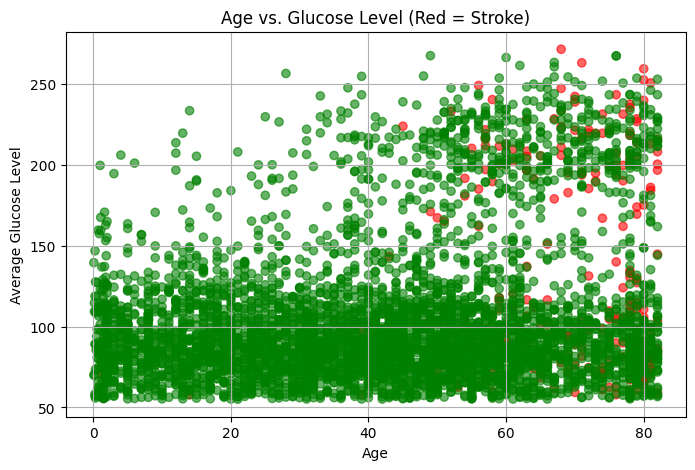

In [ ]:
plt.figure(figsize=(8, 5))
colors = ['green' if s == 0 else 'red' for s in data['stroke']]
plt.scatter(data['age'], data['avg_glucose_level'], c=colors, alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.title('Age vs. Glucose Level (Red = Stroke)')
plt.grid(True)
plt.show()

### Correlation Matrix

In [ ]:
# Show correlation between numeric features
correlation_matrix = data.corr(numeric_only=True)

print("Correlation Matrix:\n")
print(correlation_matrix)

Correlation Matrix:

                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.002999  0.325942      0.160189       0.038899   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.002999  0.006388  
age                         0.238171  0.325942  0.245257  
hypertension                0.174474  0.160189  0.127904  
heart_disease               0.161857  0.038899  0.134914  
avg_glucose_level           1.000000  0.168751  0.131945  
bmi                         0.168751  1.000000  0.038947  
strok

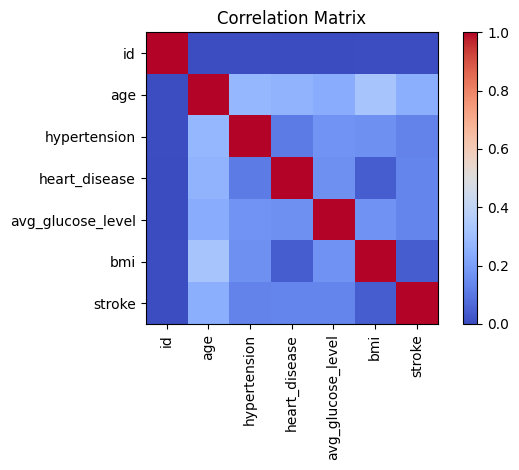

In [ ]:
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Modeling and Analysis

### Split the Data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Drop 'id' column since it's not useful for prediction
data = data.drop('id', axis=1)

# Convert categorical columns into dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)

# Separate features and target
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (4088, 16)
Testing set shape: (1022, 16)


### Train and Test Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9393346379647749

Confusion Matrix:
 [[960   0]
 [ 62   0]]
